<a href="https://colab.research.google.com/github/ImranNust/MISCELLANEOUS/blob/main/LogisticRegression_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Importing Necessary Packages
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

---
# 1. Generate Linearly Separable Data
---

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Combine X_train and y_train into a single DataFrame
df_train = pd.DataFrame(X_train, columns=['Feature 1', 'Feature 2'])
df_train['Target'] = y_train

# Display the training set (without index)
print("Training Set:")
print(df_train.head(20).to_string(index=False))

Training Set:
 Feature 1  Feature 2  Target
  2.608072  -1.659200       0
  1.608220  -1.766648       0
  3.281445  -2.376671       0
  1.852283   1.919122       1
  1.682729   1.754656       1
  2.856422   2.436577       1
  2.272062  -2.187072       0
  1.448257   1.754542       1
  3.554472   2.829259       1
  2.098200   2.046821       1
  0.615301  -0.677352       0
  1.915896  -0.304988       0
  3.031917  -3.958900       0
 -0.314699   0.625344       1
  1.220178   1.453845       1
  2.444081   2.268559       1
  2.045355  -1.642213       0
  3.696211   3.172203       1
  1.956382  -1.030365       0
  1.222673  -0.017009       0


---
# 2. Function to Plot Decision Boundary
---

In [3]:
def plot_decision_boundary(model, X, y, title, filename=None):
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=40)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

---
# 3. Simulate Pre-training Boundary (Random Model)
---

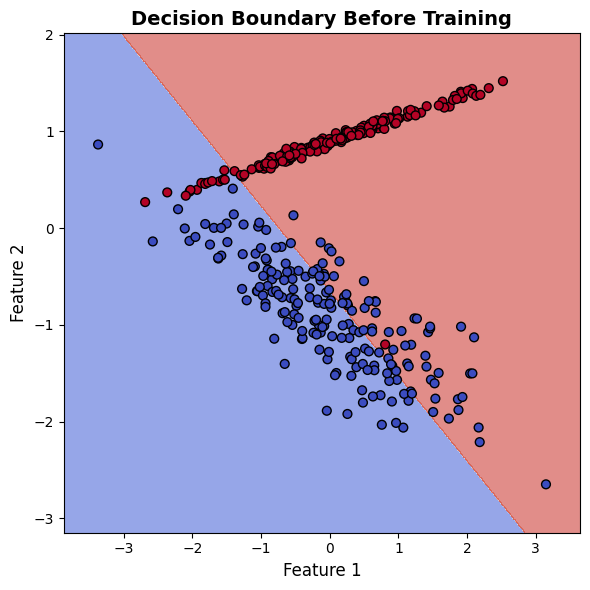

In [4]:
dummy_model = SGDClassifier(loss="log_loss", max_iter=1, tol=None, random_state=42)
dummy_model.fit(X_train_scaled, y_train)  # Dummy fit to initialize internal structures
dummy_model.coef_ = np.random.randn(1, X_train_scaled.shape[1])
dummy_model.intercept_ = np.random.randn(1)

plot_decision_boundary(dummy_model, X_train_scaled, y_train, "Decision Boundary Before Training")

---
# 4. Training Using SGDClassifier (With Log Loss) -- Logistic Regression
---

In [5]:
clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.1,
                    max_iter=1, tol=None, warm_start=True, random_state=42)

loss_history = []

for i in range(50):
    clf.fit(X_train_scaled, y_train)
    y_proba = clf.predict_proba(X_train_scaled)[:, 1]
    loss = log_loss(y_train, y_proba)
    loss_history.append(loss)

---
# 5. Plot Decision Boundary After Training
---

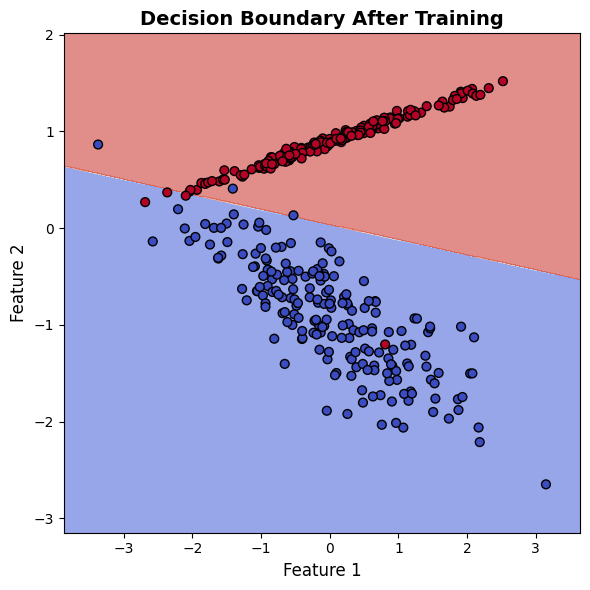

In [6]:
plot_decision_boundary(clf, X_train_scaled, y_train, "Decision Boundary After Training")

---
# 6. Plot Loss Curve
---

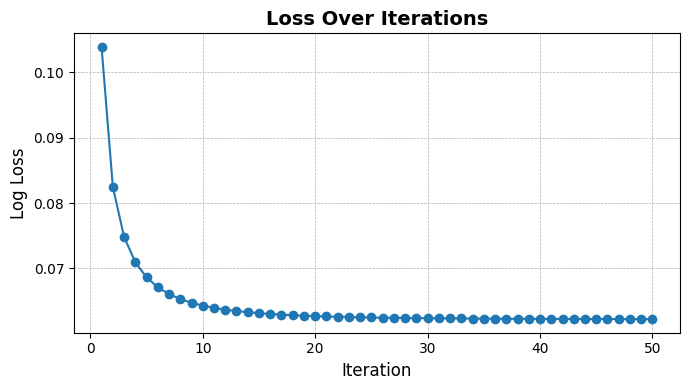

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 51), loss_history, marker='o', linestyle='-')
plt.title("Loss Over Iterations", fontsize=14, fontweight='bold')
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
